imports necesarios

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import mean_squared_error, median_absolute_error, mean_absolute_error
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV, Ridge
from sklearn.linear_model import LassoCV, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

from sklearn.neural_network import MLPRegressor

import warnings
warnings.filterwarnings("ignore")

Cargar datos y los preprocesamos

In [ ]:
from preprocesado import *

In [ ]:
X_train, y_train,  X_test, y_test = preprocesado_from_file()
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((184, 18), (184,), (47, 18), (47,))

#**MODELOS**

In [ ]:
results = pd.DataFrame(columns=['R2', 'MSE', 'median_absolute_error', 'mean_absolute_error'])

## Modelos Lineales 

###Linear Regression

In [ ]:
lr = LinearRegression(normalize=False)

lr.fit(X_train, y_train)

y_test_predicted = lr.predict(X_test)

r2_score_lr = lr.score(X_test, y_test)
mse_lr = mean_squared_error(y_test, y_test_predicted)
median_abs_error_lr = median_absolute_error(y_test, y_test_predicted)
mean_abs_error_lr = mean_absolute_error(y_test, y_test_predicted)


print('Coefficients: \n', lr.coef_[:10],'\n')
results.loc['LR', :] = [r2_score_lr, mse_lr, median_abs_error_lr, mean_abs_error_lr]
results

Coefficients: 
 [ 0.18249472  0.42927743  0.23224514  0.13767043 -0.030601    0.07372918
  0.10807048  0.15631497 -0.18425034 -0.04233355] 



,R2,MSE,median_absolute_error,mean_absolute_error
LR,0.646537,0.235975,0.237777,0.350423


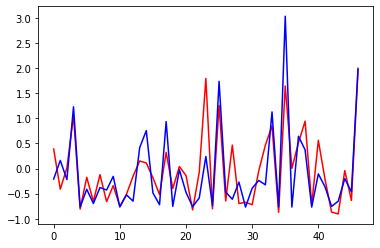

In [ ]:
plt.plot(range(len(X_test)), y_test_predicted, 'r')
plt.plot(range(len(X_test)), y_test, 'b')

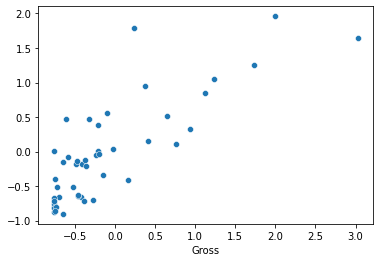

In [ ]:
sns.scatterplot(y_test, y_test_predicted)

###Ridge Regression

Buscaremos la mejor alpha, usando cross-validation

In [ ]:
lambdas = 10**np.arange(-6,2,0.1)

ridge_cv = RidgeCV(alphas=lambdas)
ridge_cv.fit(X_train, y_train)

print('Best lambda:', ridge_cv.alpha_)

Best lambda: 39.81071705534725


La mejor lambda ha resultado ser 3.162277660168211. Entonces vamos a usar valores alrededor de este.

In [ ]:
lambdas = np.arange(3.0,3.2,0.001)

ridge_cv =RidgeCV(alphas=lambdas)
ridge_cv.fit(X_train,y_train)

print('Best lambda:', ridge_cv.alpha_);

Best lambda: 3.199999999999978


In [ ]:
y_test_predicted = ridge_cv.predict(X_test)

r2_score_ridge = ridge_cv.score(X_test, y_test)
mse_ridge = mean_squared_error(y_test, y_test_predicted)
median_abs_error_ridge = median_absolute_error(y_test, y_test_predicted)
mean_abs_error_ridge = mean_absolute_error(y_test, y_test_predicted)


print('Coefficients: \n', ridge_cv.coef_[:10],'\n')
results.loc['RIDGE_CV', :] = [r2_score_ridge, mse_ridge, median_abs_error_ridge, mean_abs_error_ridge]
results

Coefficients: 
 [ 0.17611545  0.42243733  0.23041627  0.13656552 -0.03281472  0.07433537
  0.1068597   0.15278304 -0.13424606 -0.04369753] 



,R2,MSE,median_absolute_error,mean_absolute_error
LR,0.646537,0.235975,0.237777,0.350423
RIDGE_CV,0.652415,0.232051,0.236851,0.348708


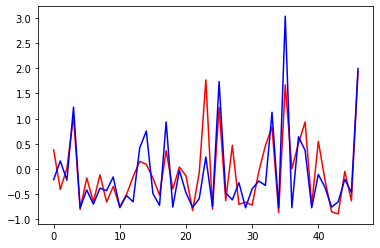

In [ ]:
plt.plot(range(len(X_test)), y_test_predicted, 'r')
plt.plot(range(len(X_test)), y_test, 'b')

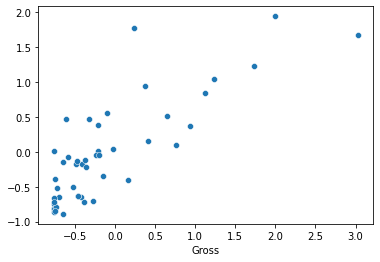

In [ ]:
sns.scatterplot(y_test, y_test_predicted)

###LASSO

In [ ]:
lambdas = 10**np.arange(-6,2,0.1)

lasso_cv =LassoCV(alphas=lambdas)
lasso_cv.fit(X_train,y_train)

print('Best lambda:', lasso_cv.alpha_)

Best lambda: 0.01258925411794125


In [ ]:
y_test_predicted = lasso_cv.predict(X_test)

r2_lasso = lasso_cv.score(X_test,y_test)
mse_lasso = mean_squared_error(y_test, y_test_predicted)
median_abs_error_lasso = median_absolute_error(y_test, y_test_predicted)
mean_abs_error_lasso = mean_absolute_error(y_test, y_test_predicted)


print('Coefficients: \n', lasso_cv.coef_[:10],'\n')
results.loc['LASSO_CV', :] = [r2_lasso, mse_lasso, median_abs_error_lasso, mean_abs_error_lasso]
results

Coefficients: 
 [ 0.15445747  0.44233699  0.22753307  0.12051578 -0.02512947  0.06220942
  0.09732853  0.12896086 -0.         -0.        ] 



,R2,MSE,median_absolute_error,mean_absolute_error
LR,0.646537,0.235975,0.237777,0.350423
RIDGE_CV,0.652415,0.232051,0.236851,0.348708
LASSO_CV,0.671146,0.219546,0.225546,0.335961


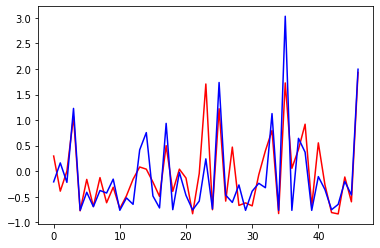

In [ ]:
plt.plot(range(len(X_test)), y_test_predicted, 'r')
plt.plot(range(len(X_test)), y_test, 'b')

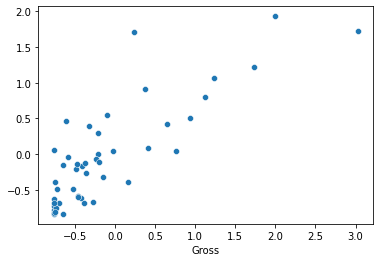

In [ ]:
sns.scatterplot(y_test, y_test_predicted)



```
# Tiene formato de código
```

###k-Nearest-Neighbours


In [ ]:
knn = KNeighborsRegressor()

knn.fit(X_train,y_train)
y_test_predicted = knn.predict(X_test)

In [ ]:
r2_knn = knn.score(X_test,y_test)
mse_knn = mean_squared_error(y_test, y_test_predicted)
median_abs_error_knn = median_absolute_error(y_test, y_test_predicted)
mean_abs_error_knn = mean_absolute_error(y_test, y_test_predicted)
results.loc['KNN', :] = [r2_knn, mse_knn, median_abs_error_knn, mean_abs_error_knn]

results

,R2,MSE,median_absolute_error,mean_absolute_error
LR,0.646537,0.235975,0.237777,0.350423
RIDGE_CV,0.652415,0.232051,0.236851,0.348708
LASSO_CV,0.671146,0.219546,0.225546,0.335961
KNN,0.409489,0.394231,0.203816,0.379763


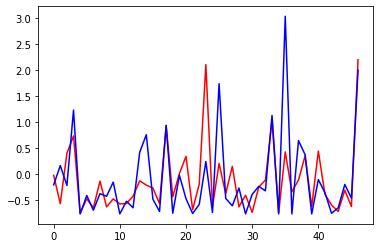

In [ ]:
plt.plot(range(len(X_test)), y_test_predicted, 'r')
plt.plot(range(len(X_test)), y_test, 'b')

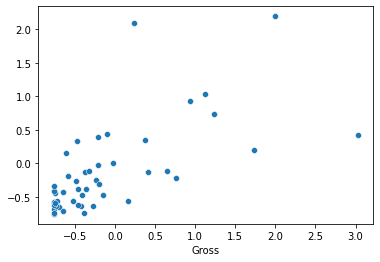

In [ ]:
sns.scatterplot(y_test, y_test_predicted)

###Linear SVM

Buscamos los mejores parámetros:

In [ ]:
cv_results = pd.DataFrame(columns=['C', 'epsilon', 'R2'])

Cs = [10,20,30,40,50,60]
epsilons = [0.001,0.0001,0.00001,0.000001,0]
for c in Cs:
    for epsilon in epsilons:
        svm = SVR(kernel='linear', C=c,epsilon=epsilon)
        svm.fit(X_train,y_train)
        y_test_predicted = svm.predict(X_test)
        cv_results.loc['LinearSVR', :] = [c, epsilon, svm.score(X_test, y_test)]
        
best = cv_results.sort_values(by='R2',ascending=False).iloc[0,:]

print("Best parameters:")
best

Best parameters:


C                60
epsilon           0
R2         0.675078
Name: LinearSVR, dtype: object

In [ ]:
c = best['C']
epsilon = best['epsilon']

svm = SVR(kernel='linear', C=c,epsilon=epsilon)
svm.fit(X_train,y_train)
y_test_predicted = svm.predict(X_test)


In [ ]:
r2_svm = svm.score(X_test,y_test)
mse_svm = mean_squared_error(y_test, y_test_predicted)
median_abs_error_svm = median_absolute_error(y_test, y_test_predicted)
mean_abs_error_svm = mean_absolute_error(y_test, y_test_predicted)
results.loc['LinearSVR', :] = [r2_svm, mse_svm, median_abs_error_svm, mean_abs_error_svm]

results

,R2,MSE,median_absolute_error,mean_absolute_error
LR,0.646537,0.235975,0.237777,0.350423
RIDGE_CV,0.652415,0.232051,0.236851,0.348708
LASSO_CV,0.671146,0.219546,0.225546,0.335961
KNN,0.409489,0.394231,0.203816,0.379763
LinearSVR,0.675078,0.216921,0.23947,0.352277


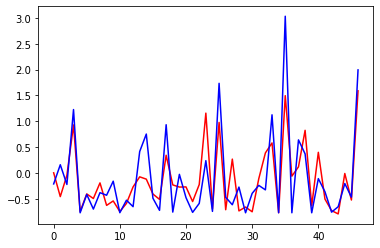

In [ ]:
plt.plot(range(len(X_test)), y_test_predicted, 'r')
plt.plot(range(len(X_test)), y_test, 'b')

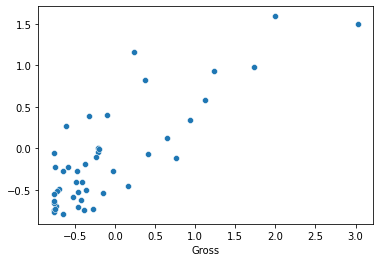

In [ ]:
sns.scatterplot(y_test, y_test_predicted)

##Modelos no-lineales

##MLP

In [ ]:
model_nnet = MLPRegressor(hidden_layer_sizes=[6],
                           alpha=0.1,
                           activation='logistic',
                           max_iter=200,
                           solver='lbfgs',random_state=42)
model_nnet.fit(X_train, y_train)
y_test_predicted = model_nnet.predict(X_test)


In [ ]:
r2_mlp = model_nnet.score(X_test,y_test)
mse_mlp = mean_squared_error(y_test, y_test_predicted)
median_abs_error_mlp = median_absolute_error(y_test, y_test_predicted)
mean_abs_error_mlp = mean_absolute_error(y_test, y_test_predicted)
results.loc['MLP', :] = [r2_mlp, mse_mlp, median_abs_error_mlp, mean_abs_error_mlp]

results

,R2,MSE,median_absolute_error,mean_absolute_error
LR,0.646537,0.235975,0.237777,0.350423
RIDGE_CV,0.652415,0.232051,0.236851,0.348708
LASSO_CV,0.671146,0.219546,0.225546,0.335961
KNN,0.409489,0.394231,0.203816,0.379763
LinearSVR,0.675078,0.216921,0.23947,0.352277
MLP,0.639187,0.240882,0.216549,0.363765


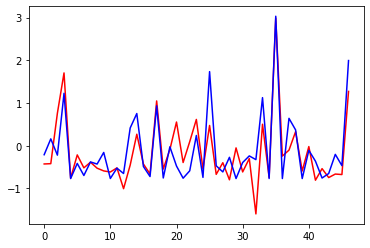

In [ ]:
plt.plot(range(len(X_test)), y_test_predicted, 'r')
plt.plot(range(len(X_test)), y_test, 'b')

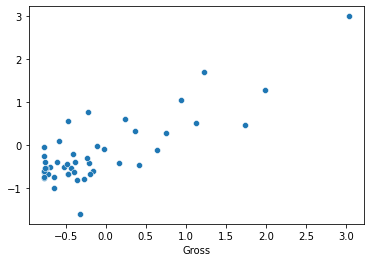

In [ ]:
sns.scatterplot(y_test, y_test_predicted)

###SVM con kernel RBF

In [ ]:
cv_results = pd.DataFrame(columns=['C', 'epsilon', 'R2'])

Cs = [10,20,30,40,50,60]
epsilons = [0.001,0.0001,0.00001,0.000001,0]
for c in Cs:
    for epsilon in epsilons:
        svm = SVR(kernel='rbf', C=c,epsilon=epsilon)
        svm.fit(X_train,y_train)
        y_test_predicted = svm.predict(X_test)
        cv_results.loc['RBF-SVR', :] = [c, epsilon, svm.score(X_test, y_test)]
        
best = cv_results.sort_values(by='R2',ascending=False).iloc[0,:]

print("Best parameters:")
best

Best parameters:


C                60
epsilon           0
R2         0.234966
Name: RBF-SVR, dtype: object

In [ ]:
c = best['C']
epsilon = best['epsilon']

svm = SVR(kernel='rbf', C=c,epsilon=epsilon)
svm.fit(X_train,y_train)
y_test_predicted = svm.predict(X_test)

In [ ]:
r2_svm = svm.score(X_test,y_test)
mse_svm = mean_squared_error(y_test, y_test_predicted)
median_abs_error_svm = median_absolute_error(y_test, y_test_predicted)
mean_abs_error_svm = mean_absolute_error(y_test, y_test_predicted)
results.loc['RBF-SVR', :] = [r2_svm, mse_svm, median_abs_error_svm, mean_abs_error_svm]

results

,R2,MSE,median_absolute_error,mean_absolute_error
LR,0.646537,0.235975,0.237777,0.350423
RIDGE_CV,0.652415,0.232051,0.236851,0.348708
LASSO_CV,0.671146,0.219546,0.225546,0.335961
KNN,0.409489,0.394231,0.203816,0.379763
LinearSVR,0.675078,0.216921,0.23947,0.352277
MLP,0.639187,0.240882,0.216549,0.363765
RBF-SVR,0.234966,0.510744,0.331211,0.493897


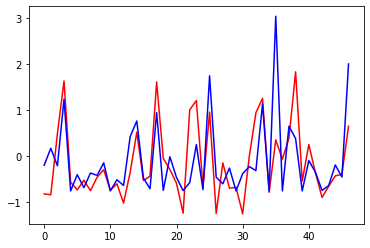

In [ ]:
plt.plot(range(len(X_test)), y_test_predicted, 'r')
plt.plot(range(len(X_test)), y_test, 'b')

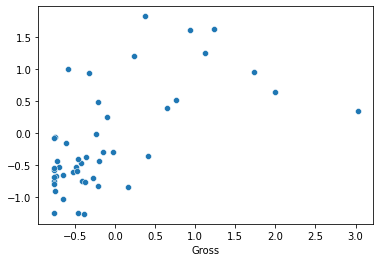

In [ ]:
sns.scatterplot(y_test, y_test_predicted)